In [ ]:
import pandas as pd

In [ ]:
df_riesgos = pd.read_excel('riesgos dataset.xlsx')

In [ ]:
df_riesgos.groupby(['sectorEmpresa', 'ixRiesgo']).size()

,idEmpresa,sCodCliente,nombreEmpresa,nSectorEmp,sectorEmpresa,idEvaluacion,dCierre,ixRiesgo,sAnalisis,ixPuesto,ixFuenteRL,sPuesto,descripPuesto,sFuenteRl,descripFuente
0,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,1,Accidentes de circulación durante la jornada l...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
1,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,2,Trabajos que implican el trato con personas aj...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252855,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,11,NaN,NaN,Art. 28 LPRL - ETT,1. Los trabajadores con relaciones de trabajo ...
252856,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,12,NaN,NaN,Señalización,NaN


In [ ]:
- agrupar por
    - sectorEmpresa
    - empresa
    - riesgo
    - idEvaluacion

In [ ]:
dff = df_riesgos.groupby(['sectorEmpresa', 'nombreEmpresa', 'ixRiesgo', 'idEvaluacion']).size().reset_index(name='Freq')

In [ ]:
dff = df_riesgos.groupby(['sectorEmpresa', 'nombreEmpresa', 'ixRiesgo', 'idEvaluacion']).size().reset_index(name='Freq')

In [ ]:
dff = dff.head(1000)

In [ ]:
df_riesgos

,idEmpresa,sCodCliente,nombreEmpresa,nSectorEmp,sectorEmpresa,idEvaluacion,dCierre,ixRiesgo,sAnalisis,ixPuesto,ixFuenteRL,sPuesto,descripPuesto,sFuenteRl,descripFuente
0,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,1,Accidentes de circulación durante la jornada l...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
1,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,2,Trabajos que implican el trato con personas aj...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252855,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,11,NaN,NaN,Art. 28 LPRL - ETT,1. Los trabajadores con relaciones de trabajo ...
252856,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,12,NaN,NaN,Señalización,NaN


In [ ]:
dff

,sectorEmpresa,nombreEmpresa,ixRiesgo,idEvaluacion,Freq
0,0. Otros,"ADMIT THERAPEUTICS, S.L.",1,4,2
1,0. Otros,"ADMIT THERAPEUTICS, S.L.",1,5,5
...,...,...,...,...,...
998,1. Construcción,ASHOT SARGSYAN,47,5,1
999,1. Construcción,ASHOT SARGSYAN,47,6,1


In [ ]:
import plotly.express as px

In [ ]:
dff.ixRiesgo = dff.ixRiesgo.astype(str)

In [ ]:
fig = px.bar(data_frame=dff, x='ixRiesgo', y='Freq', facet_col='nombreEmpresa', facet_col_wrap=3, height=1500)

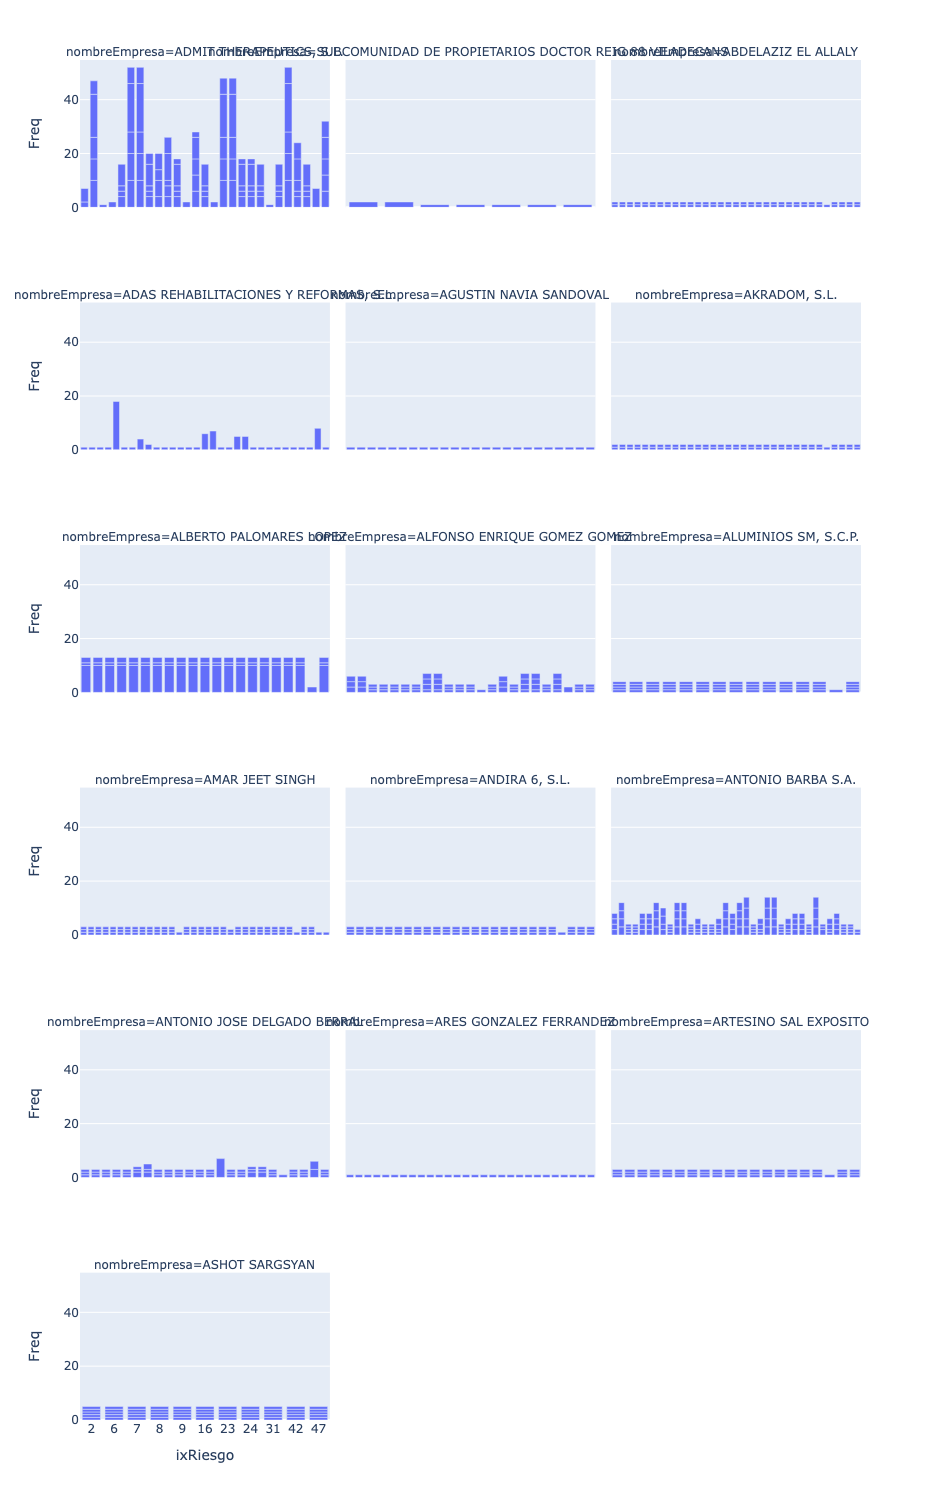

In [ ]:
fig.update_xaxes(matches=None)

In [ ]:
dff = df_riesgos.groupby(['sectorEmpresa', 'nombreEmpresa', 'sAnalisis', 'idEvaluacion']).size().reset_index(name='Freq')

In [ ]:
dff = dff.head(1000)

In [ ]:
fig = px.bar(data_frame=dff, x='sAnalisis', y='Freq', facet_col='nombreEmpresa', facet_col_wrap=3, height=1500)

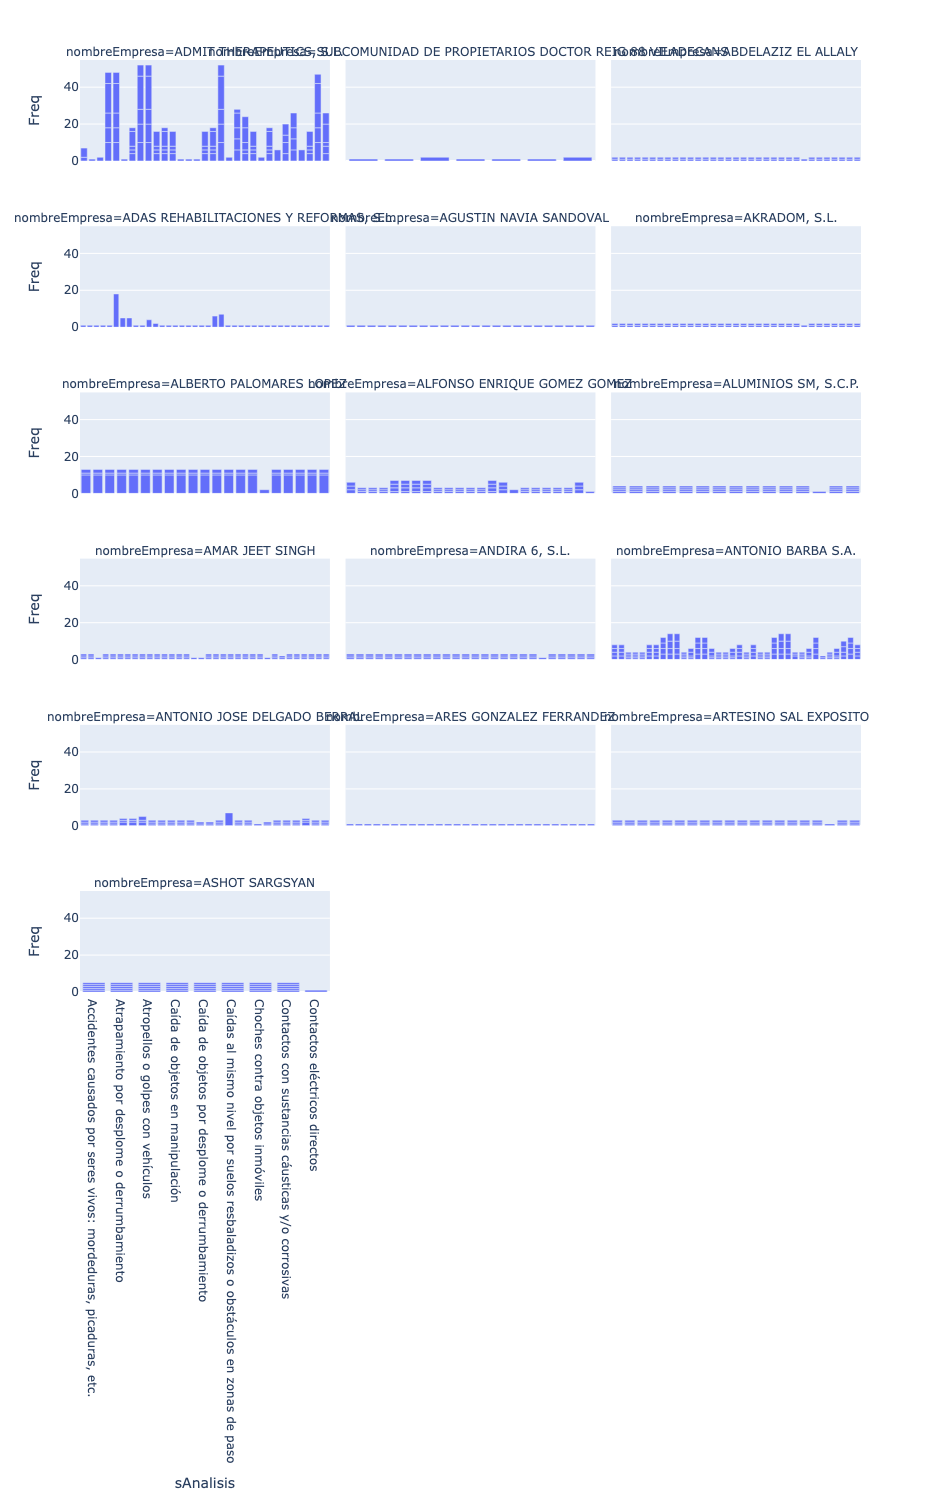

In [ ]:
fig.update_xaxes(matches=None)

In [ ]:
fig = px.bar(data_frame=dff, x='sAnalisis', y='Freq', facet_col='sectorEmpresa', facet_col_wrap=3, height=1500)

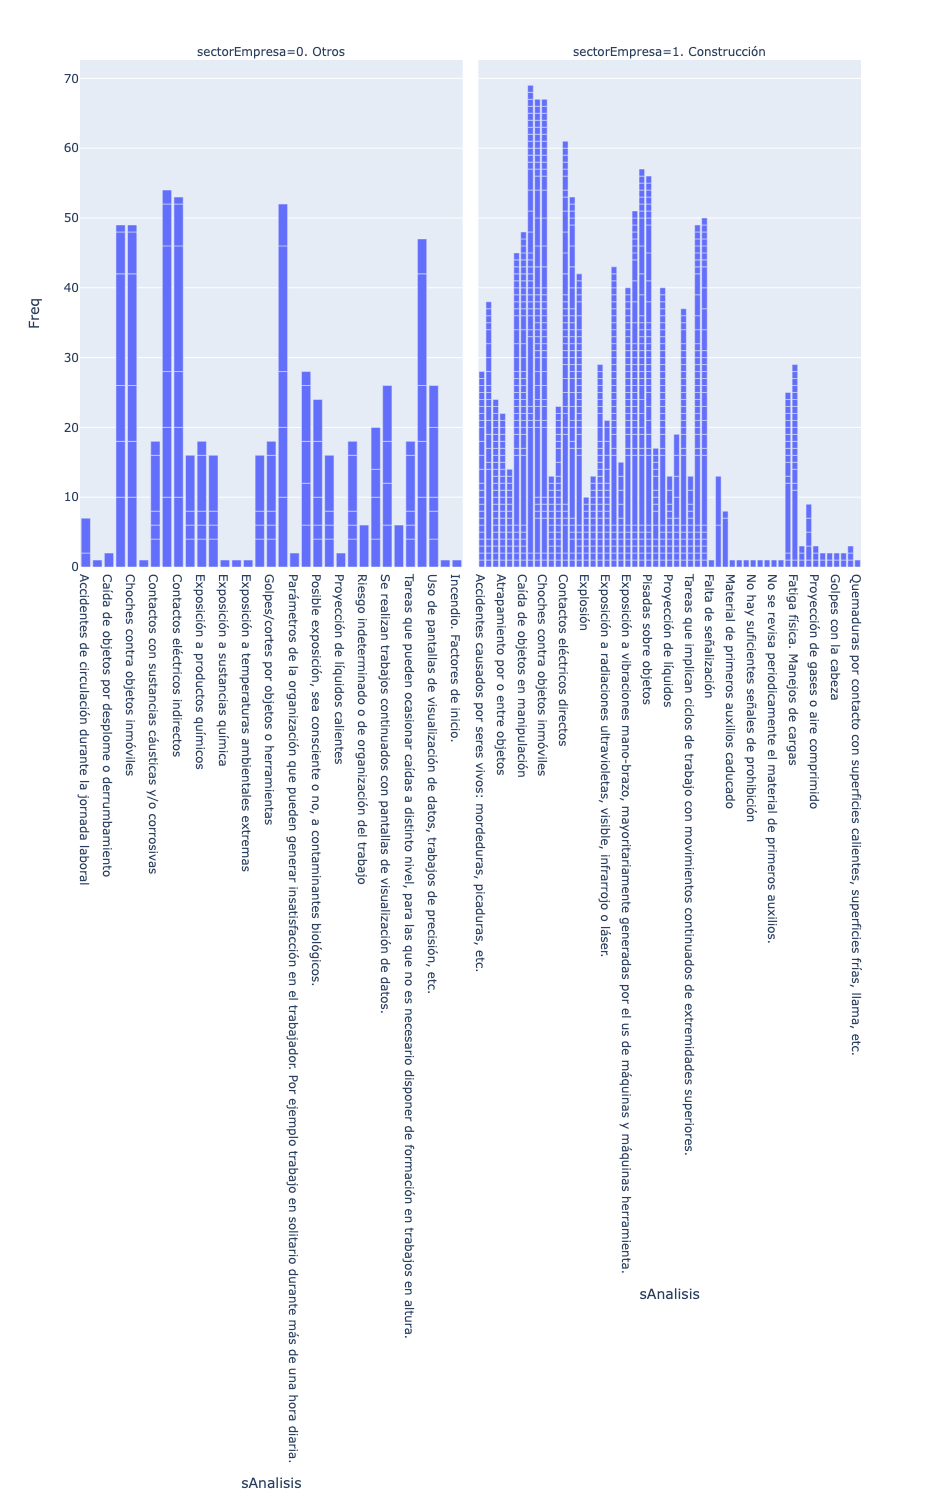

In [ ]:
fig.update_xaxes(matches=None)

- cada empresa tiene varias evaluaciones
- nosotros estamos interesados en contar las evaluaciones?

In [ ]:
dff = df_riesgos.groupby(['sectorEmpresa', 'nombreEmpresa', 'sAnalisis', 'idEvaluacion']).size().reset_index(name='Freq')

In [ ]:
dff = dff.sort_values(['sectorEmpresa', 'Freq'], ascending=False)

In [ ]:
dff_sector = dff.groupby(['sectorEmpresa', 'sAnalisis'], sort=False).Freq.sum().reset_index()

In [ ]:
dff_sector

,sectorEmpresa,sAnalisis,Freq
0,9. Servicios,Contactos eléctricos directos,7809
1,9. Servicios,Contactos eléctricos indirectos,7856
...,...,...,...
1111,0. Otros,Incendio. Evacuación.,1
1112,0. Otros,Incendio. Factores de inicio.,1


In [ ]:
dff_sector['Freq Perc'] = (dff_sector['Freq'] / dff_sector.groupby(['sectorEmpresa'])['Freq'].transform('sum'))*100

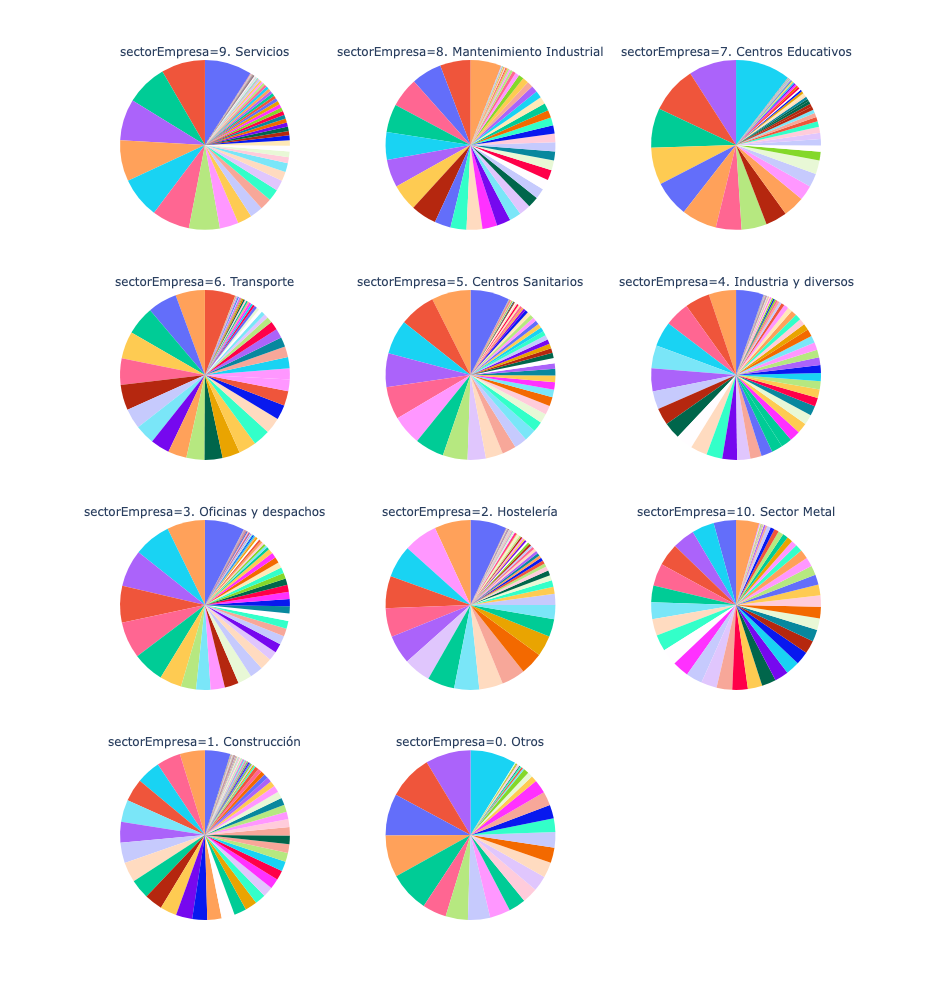

In [ ]:
fig = px.pie(data_frame=dff_sector, names='sAnalisis', values='Freq Perc',
             facet_col='sectorEmpresa', facet_col_wrap=3, height=1000)

fig = fig.update_layout(showlegend=False)
fig.update_traces(textinfo='none')

In [ ]:
mask_10 = dff_sector['Freq Perc'] < 0.5

In [ ]:
mask_freq_lower_100 = dff_sector.Freq < 100

In [ ]:
dff_sector_uncommon = dff_sector[mask_freq_lower_100][['sectorEmpresa', 'sAnalisis']]

In [ ]:
df_riesgos

,idEmpresa,sCodCliente,nombreEmpresa,nSectorEmp,sectorEmpresa,idEvaluacion,dCierre,ixRiesgo,sAnalisis,ixPuesto,ixFuenteRL,sPuesto,descripPuesto,sFuenteRl,descripFuente
0,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,1,Accidentes de circulación durante la jornada l...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
1,1,3,"ELECTRICIDAD INDUSTRIAL BLASCO, S.L.",2,1. Construcción,2,2020-04-08,2,Trabajos que implican el trato con personas aj...,1,0,Electricista,Electricistas (contemplando trabajos con plata...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252855,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,11,NaN,NaN,Art. 28 LPRL - ETT,1. Los trabajadores con relaciones de trabajo ...
252856,1624,1918,FIDA HUSSAIN,11,9. Servicios,1,1900-01-01,257,.,0,12,NaN,NaN,Señalización,NaN


In [ ]:
list_df = []

In [ ]:
for labels, data in df_riesgos.groupby(['sectorEmpresa', 'sAnalisis']):
    comp = labels == dff_sector_uncommon
    mask = comp.sum(axis=1) == 2
    if mask.sum() > 0:
        data['Incongruencia'] = 1
    else:
        data['Incongruencia'] = 0
        
    list_df.append(data)

In [ ]:
df_riesgos = pd.concat(list_df)

In [ ]:
df_riesgos_sel = df_riesgos[['sectorEmpresa', 'ixRiesgo', 'ixPuesto', 'Incongruencia']]

In [ ]:
df_riesgos_sel.to_excel('datos_seleccionados_modelo.xlsx')